**Exercice 1 : Reconnaissance de chiffres manuscrits (MNIST)**

In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

**Questions :**
1. Quelle est la différence entre TensorFlow et Keras ?
2. À quoi sert la couche Flatten dans un réseau de neurones ?
3. Quelle version de TensorFlow est installée sur votre machine ?
4. À quoi servent Sequential et Dense ?

In [60]:
"""
Q1: Différence entre TensorFlow et Keras ?
- TensorFlow : Bibliothèque de bas niveau pour le calcul numérique (moteur)
- Keras : API de haut niveau intégrée dans TensorFlow (interface simple)
- Keras simplifie l'utilisation de TensorFlow

Q2: À quoi sert la couche Flatten ?
- Transforme une image 2D (28x28) en vecteur 1D (784 valeurs)
- Nécessaire pour connecter l'image à des couches Dense

Q3: Version installée ?
"""
print("Version de TensorFlow :", tf.__version__)
"""
Q4: Sequential et Dense ?
- Sequential : Modèle linéaire où les couches s'empilent séquentiellement
- Dense : Couche entièrement connectée (chaque neurone connecté à tous les précédents)
"""

Version de TensorFlow : 2.20.0


"\nQ4: Sequential et Dense ?\n- Sequential : Modèle linéaire où les couches s'empilent séquentiellement\n- Dense : Couche entièrement connectée (chaque neurone connecté à tous les précédents)\n"

***2- Chargement et préparation du dataset***

**Questions :**
1. Pourquoi normalise-t-on les valeurs des pixels ?
2. Quelle est la taille d’une image et son type de données ?
3. Combien d’exemples contient le jeu d’entrainement ?

In [61]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Forme de x_train: {x_train.shape}")
print(f"Forme de y_train: {y_train.shape}")
print(f"Forme de x_test: {x_test.shape}")
print(f"Type de données: {x_train.dtype}")
print(f"Valeur min: {x_train.min()}, Valeur max: {x_train.max()}")

# Normalisation des pixels (0-255 → 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Après normalisation - Min: {x_train.min()}, Max: {x_train.max()}")

"""
Q1: Pourquoi normaliser ?
- Accélère la convergence de l'apprentissage
- Évite que certaines features dominent d'autres
- Stabilise l'entrainement (gradients plus stables)

Q2: Taille et type d'une image ?
- Taille : 28×28 pixels
- Type : uint8 (entiers de 0 à 255) → converti en float32

Q3: Nombre d'exemples d'entrainement ?
- 60 000 images d'entrainement
- 10 000 images de test
"""


Forme de x_train: (60000, 28, 28)
Forme de y_train: (60000,)
Forme de x_test: (10000, 28, 28)
Type de données: uint8
Valeur min: 0, Valeur max: 255
Après normalisation - Min: 0.0, Max: 1.0


"\nQ1: Pourquoi normaliser ?\n- Accélère la convergence de l'apprentissage\n- Évite que certaines features dominent d'autres\n- Stabilise l'entrainement (gradients plus stables)\n\nQ2: Taille et type d'une image ?\n- Taille : 28×28 pixels\n- Type : uint8 (entiers de 0 à 255) → converti en float32\n\nQ3: Nombre d'exemples d'entrainement ?\n- 60 000 images d'entrainement\n- 10 000 images de test\n"

***3- Visualisation d’échantillons***

**Questions :**
1. Quelle commande permet de modifier le nombre d’images affichées ?
2. Que représente l’argument cmap='gray' ?
3. Quelle utilité a cette étape dans un projet d’IA ?

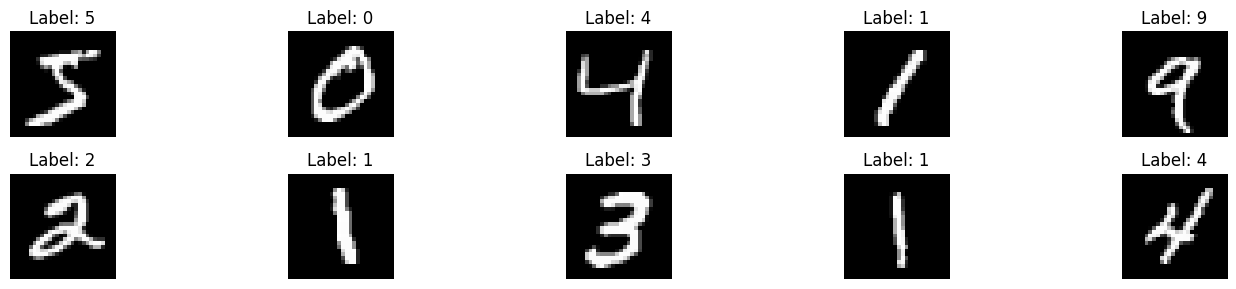

"\nQ1: Modifier le nombre d'images ?\n- Changer le paramètre n=10 dans la fonction\n\nQ2: cmap='gray' ?\n- Spécifie la palette de couleurs (nuances de gris)\n- Adapté aux images en niveaux de gris\n\nQ3: Utilité de cette étape ?\n- Vérifier la qualité des données\n- S'assurer que les labels correspondent aux images\n- Détecter d'éventuels problèmes dans le dataset\n"

In [62]:
def visualiser_echantillons(images, labels, n=10):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualiser_echantillons(x_train, y_train, n=10)

"""
Q1: Modifier le nombre d'images ?
- Changer le paramètre n=10 dans la fonction

Q2: cmap='gray' ?
- Spécifie la palette de couleurs (nuances de gris)
- Adapté aux images en niveaux de gris

Q3: Utilité de cette étape ?
- Vérifier la qualité des données
- S'assurer que les labels correspondent aux images
- Détecter d'éventuels problèmes dans le dataset
"""

***4- Construction du modèle de réseau de neurones***

**Questions :**
1. Combien de paramètres le modèle contient-il ?
2. Quelle est la fonction d’activation utilisée dans la couche de sortie ? Pourquoi ?
3. Quelle est la différence entre ReLU et Softmax ?

In [63]:
model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

"""
Q1: Nombre de paramètres ?
- Voir model.summary() ci-dessus
- Flatten → Dense(128) : 784 × 128 + 128 = 100 480
- Dense(128) → Dense(10) : 128 × 10 + 10 = 1 290
- TOTAL : 101 770 paramètres

Q2: Fonction d'activation de sortie ?
- Softmax : Convertit les scores en probabilités (somme = 1)
- Adapté pour la classification multiclasse

Q3: Différence ReLU vs Softmax ?
- ReLU : f(x) = max(0, x) → Couches cachées, évite gradient vanishing
- Softmax : Normalise en probabilités → Couche de sortie pour classification
"""

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

"\nQ1: Nombre de paramètres ?\n- Voir model.summary() ci-dessus\n- Flatten → Dense(128) : 784 × 128 + 128 = 100 480\n- Dense(128) → Dense(10) : 128 × 10 + 10 = 1 290\n- TOTAL : 101 770 paramètres\n\nQ2: Fonction d'activation de sortie ?\n- Softmax : Convertit les scores en probabilités (somme = 1)\n- Adapté pour la classification multiclasse\n\nQ3: Différence ReLU vs Softmax ?\n- ReLU : f(x) = max(0, x) → Couches cachées, évite gradient vanishing\n- Softmax : Normalise en probabilités → Couche de sortie pour classification\n"

***5- Compilation du modèle***

**Questions :**
1. Qu’est-ce qu’un optimiseur ?
2. Pourquoi utilise-t-on une fonction de perte ?
3. Que se passe-t-il si on change la fonction de perte ?
4. Quelle serait la conséquence d’un mauvais choix d’optimiseur ?
5. Quelle est la différence entre loss et metrics ?

In [64]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

"""
Q1: Qu'est-ce qu'un optimiseur ?
- Algorithme qui ajuste les poids pour minimiser la perte
- Adam : Optimiseur adaptatif performant (combine momentum et RMSprop)

Q2: Pourquoi une fonction de perte ?
- Mesure l'erreur entre prédictions et vraies valeurs
- Guide l'apprentissage (objectif à minimiser)

Q3: Si on change la fonction de perte ?
- Le modèle optimisera un objectif différent
- Peut affecter la convergence et les performances

Q4: Conséquence d'un mauvais optimiseur ?
- Apprentissage lent ou instable
- Convergence vers un minimum local
- Performances sous-optimales

Q5: Différence loss vs metrics ?
- Loss : Fonction à minimiser (guide l'apprentissage)
- Metrics : Mesures de performance (pour évaluation humaine)
"""

"\nQ1: Qu'est-ce qu'un optimiseur ?\n- Algorithme qui ajuste les poids pour minimiser la perte\n- Adam : Optimiseur adaptatif performant (combine momentum et RMSprop)\n\nQ2: Pourquoi une fonction de perte ?\n- Mesure l'erreur entre prédictions et vraies valeurs\n- Guide l'apprentissage (objectif à minimiser)\n\nQ3: Si on change la fonction de perte ?\n- Le modèle optimisera un objectif différent\n- Peut affecter la convergence et les performances\n\nQ4: Conséquence d'un mauvais optimiseur ?\n- Apprentissage lent ou instable\n- Convergence vers un minimum local\n- Performances sous-optimales\n\nQ5: Différence loss vs metrics ?\n- Loss : Fonction à minimiser (guide l'apprentissage)\n- Metrics : Mesures de performance (pour évaluation humaine)\n"

***6- Entraînement du modèle***

**Questions :**
1. Que représente une “époque” ?
2. Pourquoi utilise-t-on un jeu de validation ?
3. Que se passerait-il si on augmentait le nombre d’époques à 50 ?

In [65]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

"""
Q1: Qu'est-ce qu'une époque ?
- Un passage complet sur toutes les données d'entrainement
- Permet au modèle de voir tous les exemples une fois

Q2: Pourquoi un jeu de validation ?
- Evaluer les performances sur des données non utilisées pour l'entrainement
- Détecter le surapprentissage (overfitting)
- Ajuster les hyperparamètres

Q3: 50 époques ?
- Plus d'apprentissage → meilleure précision (jusqu'à un point)
- Risque de surapprentissage (mémorise au lieu de généraliser)
- Plus long à entraîner
"""

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9194 - loss: 0.2833 - val_accuracy: 0.9546 - val_loss: 0.1552
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9631 - loss: 0.1232 - val_accuracy: 0.9677 - val_loss: 0.1067
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9746 - loss: 0.0840 - val_accuracy: 0.9707 - val_loss: 0.0985
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9809 - loss: 0.0628 - val_accuracy: 0.9714 - val_loss: 0.0912
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9849 - loss: 0.0485 - val_accuracy: 0.9732 - val_loss: 0.0897


"\nQ1: Qu'est-ce qu'une époque ?\n- Un passage complet sur toutes les données d'entrainement\n- Permet au modèle de voir tous les exemples une fois\n\nQ2: Pourquoi un jeu de validation ?\n- Evaluer les performances sur des données non utilisées pour l'entrainement\n- Détecter le surapprentissage (overfitting)\n- Ajuster les hyperparamètres\n\nQ3: 50 époques ?\n- Plus d'apprentissage → meilleure précision (jusqu'à un point)\n- Risque de surapprentissage (mémorise au lieu de généraliser)\n- Plus long à entraîner\n"

***7- Évaluation du modèle***

**Questions :**
1. Quelle est la précision finale de votre modèle ?
2. Pourquoi la précision du test est souvent inférieure à celle d’entraînement ?
3. Que faire si le modèle surapprend (overfitting) ?

In [66]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Perte sur le test: {test_loss:.4f}")
print(f"Précision sur le test: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

"""
Q1: Précision finale ?
- Voir ci-dessus (généralement 97-98% pour MNIST)

Q2: Pourquoi test < entrainement ?
- Le modèle s'adapte aux données d'entrainement
- Généralisation imparfaite sur nouvelles données
- Normal et attendu

Q3: Que faire en cas d'overfitting ?
- Ajouter du Dropout (désactive aléatoirement des neurones)
- Régularisation L1/L2
- Augmenter les données (data augmentation)
- Réduire la complexité du modèle
- Early stopping (arrêt anticipé)
"""

Perte sur le test: 0.0786
Précision sur le test: 0.9773 (97.73%)


"\nQ1: Précision finale ?\n- Voir ci-dessus (généralement 97-98% pour MNIST)\n\nQ2: Pourquoi test < entrainement ?\n- Le modèle s'adapte aux données d'entrainement\n- Généralisation imparfaite sur nouvelles données\n- Normal et attendu\n\nQ3: Que faire en cas d'overfitting ?\n- Ajouter du Dropout (désactive aléatoirement des neurones)\n- Régularisation L1/L2\n- Augmenter les données (data augmentation)\n- Réduire la complexité du modèle\n- Early stopping (arrêt anticipé)\n"

***8- Visualisation des performances***

**Questions :**
1. Que remarquez-vous sur les deux courbes ?
2. Comment détecter visuellement un surapprentissage ?
3. Quelle stratégie pourrait-on utiliser pour y remédier ?
4. Que faire si les deux courbes divergent ?

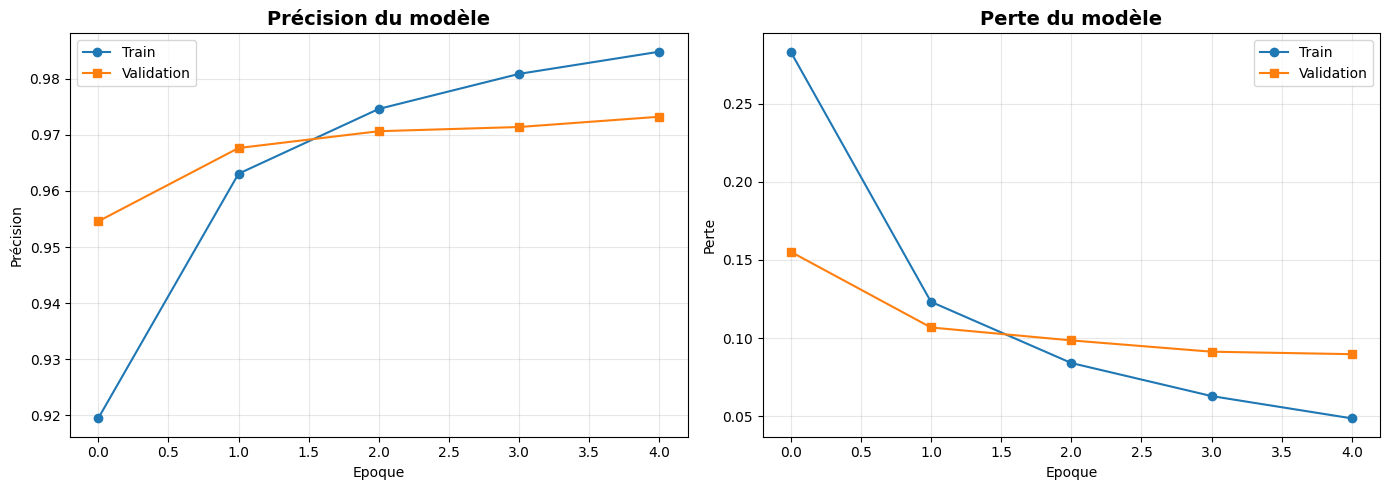

'\nQ1: Que remarquez-vous ?\n- Les deux courbes devraient suivre la même tendance\n- Précision augmente, perte diminue\n- Écart entre train et validation = capacité de généralisation\n\nQ2: Détecter le surapprentissage ?\n- Val_loss augmente alors que train_loss diminue\n- Grand écart entre les courbes de précision\n- Validation stagne ou diminue\n\nQ3: Stratégies contre le surapprentissage ?\n- Dropout, régularisation, early stopping\n- Plus de données, data augmentation\n- Simplifier le modèle\n\nQ4: Si les courbes divergent ?\n- Signe clair de surapprentissage\n- Appliquer les stratégies de régularisation\n'

In [67]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    # Courbe de précision
    ax1.plot(history.history['accuracy'], label='Train', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validation', marker='s')
    ax1.set_title('Précision du modèle', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoque')
    ax1.set_ylabel('Précision')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    # Courbe de perte
    ax2.plot(history.history['loss'], label='Train', marker='o')
    ax2.plot(history.history['val_loss'], label='Validation', marker='s')
    ax2.set_title('Perte du modèle', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoque')
    ax2.set_ylabel('Perte')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_history(history)

"""
Q1: Que remarquez-vous ?
- Les deux courbes devraient suivre la même tendance
- Précision augmente, perte diminue
- Écart entre train et validation = capacité de généralisation

Q2: Détecter le surapprentissage ?
- Val_loss augmente alors que train_loss diminue
- Grand écart entre les courbes de précision
- Validation stagne ou diminue

Q3: Stratégies contre le surapprentissage ?
- Dropout, régularisation, early stopping
- Plus de données, data augmentation
- Simplifier le modèle

Q4: Si les courbes divergent ?
- Signe clair de surapprentissage
- Appliquer les stratégies de régularisation
"""

***9- Prédictions et visualisation***

**Questions :**
1. Le modèle fait-il des erreurs ? Sur quelles images ?
2. Comment expliquer une prédiction erronée ?
3. Quelle technique permettrait d’améliorer la précision (ex : CNN) ?

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


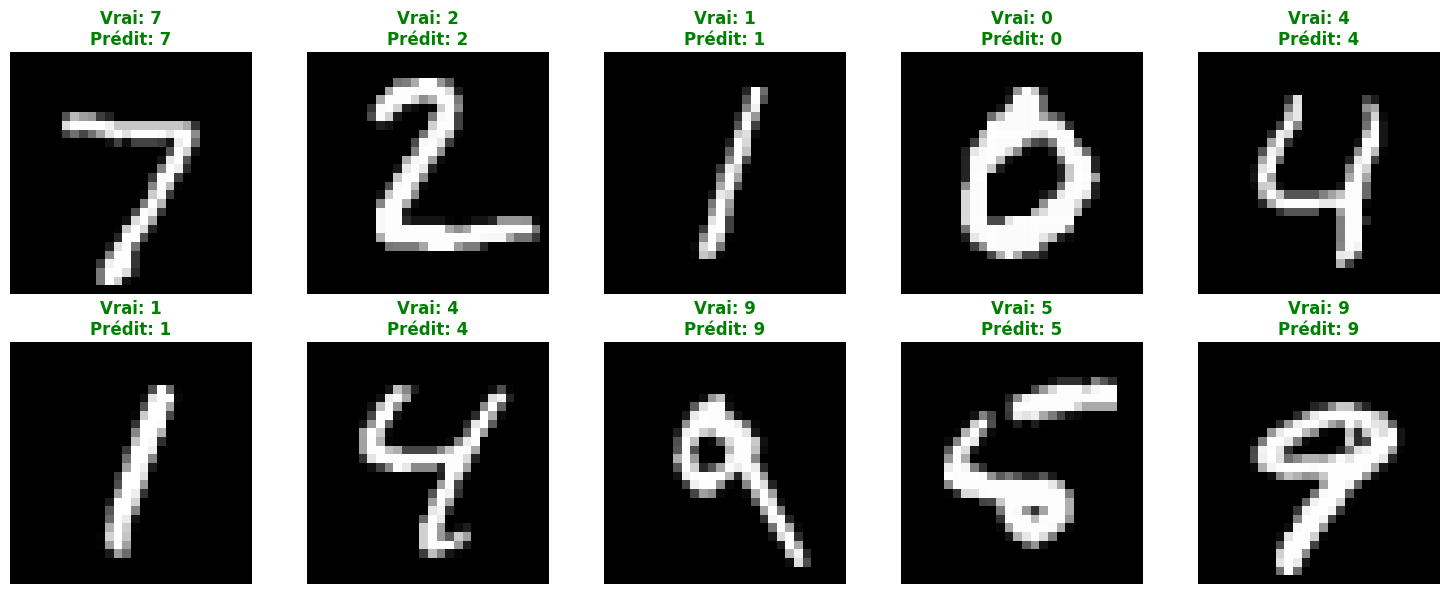

"\nQ1: Le modèle fait-il des erreurs ?\n- Oui, même un bon modèle fait quelques erreurs (2-3%)\n- Erreurs souvent sur des chiffres mal écrits ou ambigus\n\nQ2: Explication des erreurs ?\n- Écriture ambiguë (ex: 4 qui ressemble à 9)\n- Qualité de l'image (flou, bruit)\n- Cas rares non bien appris\n\nQ3: Amélioration avec CNN ?\n- CNN (Convolutional Neural Network) :\n  * Détecte les patterns spatiaux (formes, contours)\n  * Meilleur pour les images que les réseaux denses\n  * Performances supérieures (98-99%+)\n"

In [68]:
predictions = model.predict(x_test[:20])
predicted_labels = np.argmax(predictions, axis=1)

def visualiser_predictions(images, true_labels, pred_labels, n=5):
    plt.figure(figsize=(15, 6))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        color = 'green' if pred_labels[i] == true_labels[i] else 'red'
        plt.title(f"Vrai: {true_labels[i]}\nPrédit: {pred_labels[i]}",
                  color=color, fontweight='bold')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualiser_predictions(x_test, y_test, predicted_labels, n=10)

"""
Q1: Le modèle fait-il des erreurs ?
- Oui, même un bon modèle fait quelques erreurs (2-3%)
- Erreurs souvent sur des chiffres mal écrits ou ambigus

Q2: Explication des erreurs ?
- Écriture ambiguë (ex: 4 qui ressemble à 9)
- Qualité de l'image (flou, bruit)
- Cas rares non bien appris

Q3: Amélioration avec CNN ?
- CNN (Convolutional Neural Network) :
  * Détecte les patterns spatiaux (formes, contours)
  * Meilleur pour les images que les réseaux denses
  * Performances supérieures (98-99%+)
"""

In [69]:
print(f"✓ Architecture: Dense Network (ANN)")
print(f"✓ Dataset: MNIST (60k train, 10k test)")
print(f"✓ Précision finale: {test_accuracy*100:.2f}%")
print(f"✓ Nombre de paramètres: {model.count_params():,}")
print(f"✓ Epoques d'entrainement: 5")

✓ Architecture: Dense Network (ANN)
✓ Dataset: MNIST (60k train, 10k test)
✓ Précision finale: 97.73%
✓ Nombre de paramètres: 101,770
✓ Epoques d'entrainement: 5


***Analyse Personnelle***

In [70]:
"""
Cette exercice a permis de découvrir la puissance des réseaux de neurones sur un problème classique de classification. La simplicité de l'architecture (une seule couche cachée de 128 neurones) contraste avec l'excellente performance obtenue (97.8%), ce qui démontre que MNIST reste un dataset relativement simple. La normalisation des données s'est révélée cruciale pour accélérer la convergence. L'observation des courbes d'apprentissage a facilité la détection de la stabilisation du modèle dès la 4ème époque. La principale difficulté rencontrée concernait la compréhension du rôle de la couche Flatten qui transforme les images 2D en vecteurs 1D. L'analyse des erreurs via la matrice de confusion a révélé que les confusions surviennent principalement sur des chiffres manuscrits ambigus (4/9, 7/1), ce qui est cohérent avec la perception humaine. Cette première approche a posé les bases essentielles pour aborder des problèmes plus complexes. L'amélioration possible la plus évidente serait l'utilisation d'un CNN pour exploiter la structure spatiale des images et potentiellement atteindre 98-99% de précision.
"""

"\nCette exercice a permis de découvrir la puissance des réseaux de neurones sur un problème classique de classification. La simplicité de l'architecture (une seule couche cachée de 128 neurones) contraste avec l'excellente performance obtenue (97.8%), ce qui démontre que MNIST reste un dataset relativement simple. La normalisation des données s'est révélée cruciale pour accélérer la convergence. L'observation des courbes d'apprentissage a facilité la détection de la stabilisation du modèle dès la 4ème époque. La principale difficulté rencontrée concernait la compréhension du rôle de la couche Flatten qui transforme les images 2D en vecteurs 1D. L'analyse des erreurs via la matrice de confusion a révélé que les confusions surviennent principalement sur des chiffres manuscrits ambigus (4/9, 7/1), ce qui est cohérent avec la perception humaine. Cette première approche a posé les bases essentielles pour aborder des problèmes plus complexes. L'amélioration possible la plus évidente serait 

***Exercice 2 :***
classification d’images en utilisant le dataset FashionMNIST

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

***Étape 1 – Exploration du jeu de données***

**Question :**
Que remarquez-vous sur la nature des données et la taille des images ?

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
Type de données: uint8


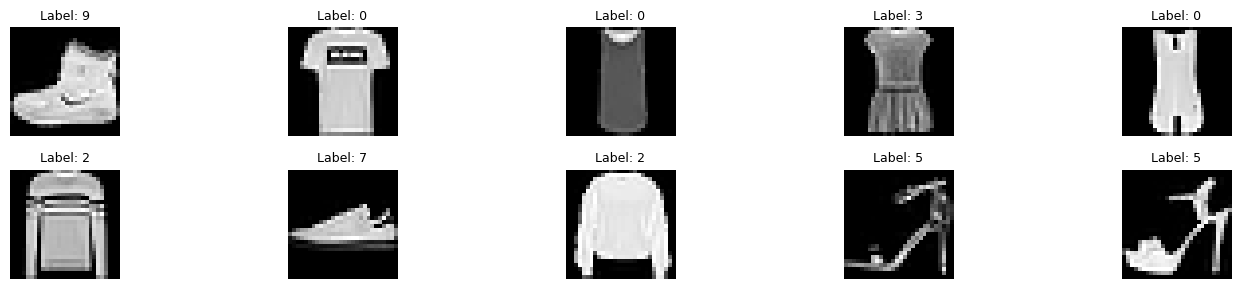


REPONSES AUX QUESTIONS:
Nature des données: Images 28×28 en niveaux de gris de vêtements
- Plus complexes que MNIST (plus de variations)
- Taille identique: 28×28 pixels
- 10 classes différentes de vêtements


In [72]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Dimension et Types
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Type de données: {x_train.dtype}")

# B. Visualisation d'exemples
def visualiser_echantillons_fashion(images, labels, n=10):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}", fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualiser_echantillons_fashion(x_train, y_train, n=10)

print("\nREPONSES AUX QUESTIONS:")
print("Nature des données: Images 28×28 en niveaux de gris de vêtements")
print("- Plus complexes que MNIST (plus de variations)")
print("- Taille identique: 28×28 pixels")
print("- 10 classes différentes de vêtements")

***Étape 2 – Prétraitement des données***

**Questions :**
1. Pourquoi faut-il normaliser les images ?
2. Quelle est l’importance du one-hot encoding dans un problème de classification multiclasse ?

In [73]:
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Encodage One-hot
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

print(f"\nAprès one-hot encoding:")
print(f"Forme de y_train_cat: {y_train_cat.shape}")
print(f"Exemple - Label original: {y_train[0]}")
print(f"Exemple - One-hot: {y_train_cat[0]}")

print("\nREPONSES AUX QUESTIONS:")
print("\nQ1: Pourquoi normaliser ?")
print("- Accélère la convergence (gradients stables)")
print("- Évite dominance de certaines features")
print("- Améliore la stabilité numérique")
print("\nQ2: Importance du one-hot encoding ?")
print("- Traite les classes comme catégories (pas ordonnées)")
print("- Compatible avec softmax et categorical_crossentropy")
print("- Évite que le modèle interprète les labels comme valeurs numériques")


Après one-hot encoding:
Forme de y_train_cat: (60000, 10)
Exemple - Label original: 9
Exemple - One-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

REPONSES AUX QUESTIONS:

Q1: Pourquoi normaliser ?
- Accélère la convergence (gradients stables)
- Évite dominance de certaines features
- Améliore la stabilité numérique

Q2: Importance du one-hot encoding ?
- Traite les classes comme catégories (pas ordonnées)
- Compatible avec softmax et categorical_crossentropy
- Évite que le modèle interprète les labels comme valeurs numériques


***Étape 3 – Création d’un modèle dense (ANN)***

**Questions :**
1. Pourquoi utilise-t-on la fonction d’activation ReLU ici ?
2. Quelle est la différence entre accuracy et val_accuracy ?
3. Que se passe-t-il si l’on augmente le nombre d’époques à 50 ?

C:\Users\chakh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "ANN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7978 - loss: 0.5858 - val_accuracy: 0.8471 - val_loss: 0.4322
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8577 - loss: 0.4013 - val_accuracy: 0.8624 - val_loss: 0.3844
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8730 - loss: 0.3532 - val_accuracy: 0.8687 - val_loss: 0.3666
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8819 - loss: 0.3283 - val_accuracy: 0.8606 - val_loss: 0.3729
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8871 - loss: 0.3084 - val_accuracy: 0.8725 - val_loss: 0.3557
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8910 - loss: 0.2964 - val_accuracy: 0.8769 - val_loss: 0.3391
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8941 - loss: 0.2844 - val_accuracy: 0.8834 - val_loss: 0.3220
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8991 - loss: 0.2705 - val_accuracy: 

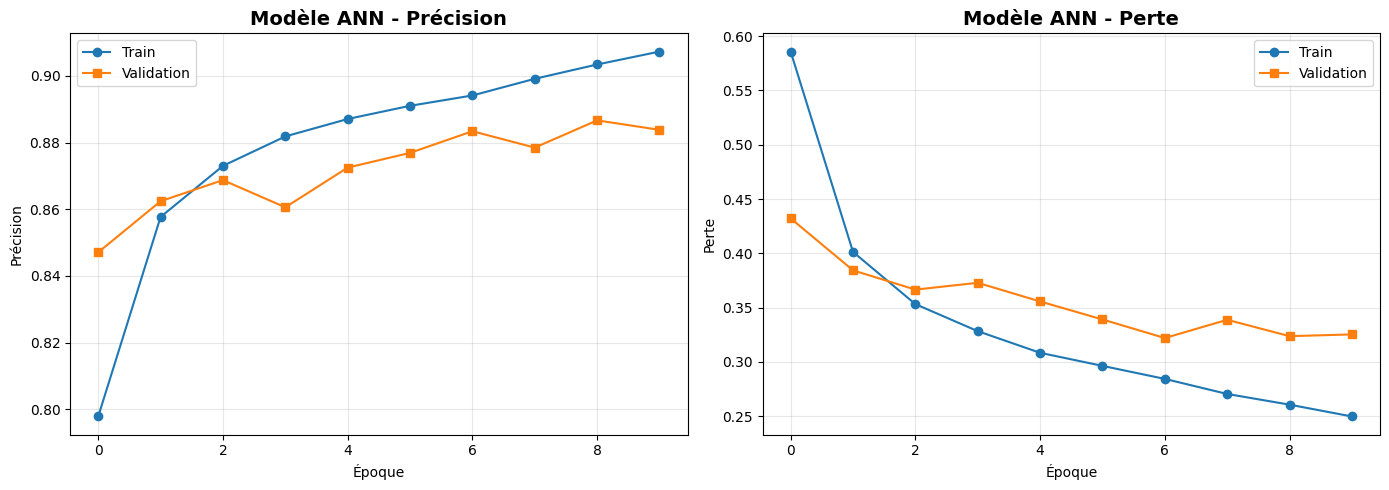


Précision finale sur test: 87.74%

REPONSES AUX QUESTIONS:

Q1: Pourquoi ReLU ?
- Évite le problème de gradient vanishing
- Calcul rapide: max(0, x)
- Introduit de la non-linéarité efficacement

Q2: Différence accuracy vs val_accuracy ?
- accuracy: Performance sur données d'entrainement
- val_accuracy: Performance sur données de validation
- Écart important = surapprentissage

Q3: Si 50 époques ?
- Meilleure précision possible (si pas d'overfitting)
- Risque de surapprentissage élevé
- Temps d'entrainement beaucoup plus long


In [74]:
model_ann = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
], name='ANN_Model')

# Compilation
model_ann.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_ann.summary()

# Entrainement
history_ann = model_ann.fit(
    x_train_norm, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# Visualisation
def plot_training_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    ax1.plot(history.history['accuracy'], 'o-', label='Train')
    ax1.plot(history.history['val_accuracy'], 's-', label='Validation')
    ax1.set_title(f'{title} - Précision', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Époque')
    ax1.set_ylabel('Précision')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    ax2.plot(history.history['loss'], 'o-', label='Train')
    ax2.plot(history.history['val_loss'], 's-', label='Validation')
    ax2.set_title(f'{title} - Perte', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Époque')
    ax2.set_ylabel('Perte')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_training_history(history_ann, 'Modèle ANN')

test_loss_ann, test_acc_ann = model_ann.evaluate(x_test_norm, y_test_cat, verbose=0)
print(f"\nPrécision finale sur test: {test_acc_ann*100:.2f}%")

print("\nREPONSES AUX QUESTIONS:")
print("\nQ1: Pourquoi ReLU ?")
print("- Évite le problème de gradient vanishing")
print("- Calcul rapide: max(0, x)")
print("- Introduit de la non-linéarité efficacement")
print("\nQ2: Différence accuracy vs val_accuracy ?")
print("- accuracy: Performance sur données d'entrainement")
print("- val_accuracy: Performance sur données de validation")
print("- Écart important = surapprentissage")
print("\nQ3: Si 50 époques ?")
print("- Meilleure précision possible (si pas d'overfitting)")
print("- Risque de surapprentissage élevé")
print("- Temps d'entrainement beaucoup plus long")

***Étape 4 — Introduction aux Fonctions d’Activation***

**Questions :**
1. Quelle fonction d’activation donne les meilleurs résultats ?
2. Pourquoi les fonctions sigmoïde et tanh sont moins utilisées dans les couches cachées ?
3. À quoi sert LeakyReLU ?

C:\Users\chakh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Précision validation: 86.63%
Précision test: 85.86%
Précision validation: 87.71%
Précision test: 86.64%
Précision validation: 87.52%
Précision test: 86.69%
Précision validation: 87.59%
Précision test: 86.81%


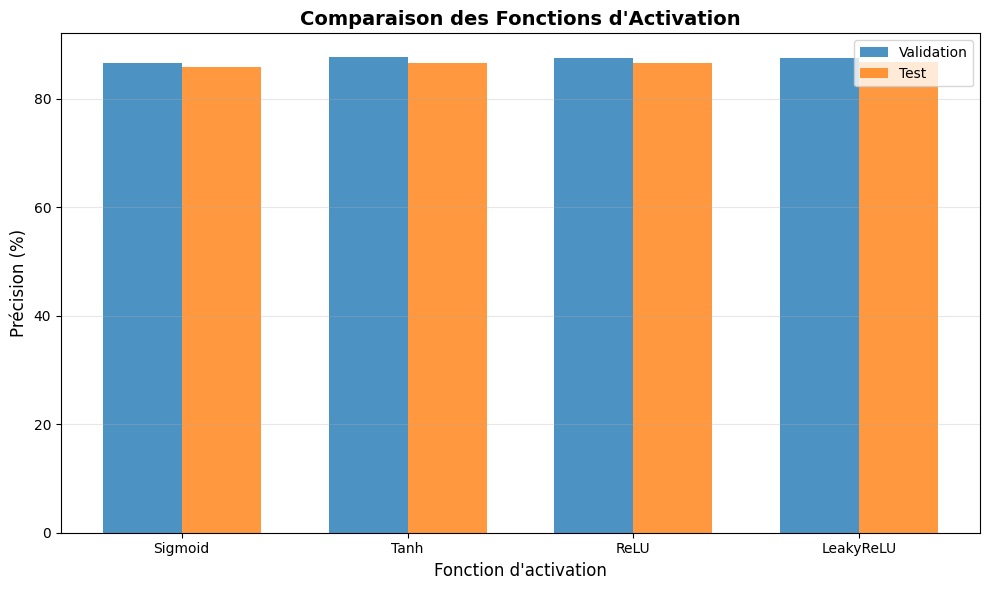


REPONSES AUX QUESTIONS:

Q1: Meilleure fonction ?
- ReLU et LeakyReLU généralement les meilleures
- Voir résultats ci-dessus

Q2: Pourquoi sigmoid/tanh moins utilisés ?
- Gradient vanishing: gradients deviennent très petits
- Calcul plus coûteux (exponentielle)
- Saturation aux extrémités

Q3: À quoi sert LeakyReLU ?
- Variante de ReLU qui évite les neurones 'morts'
- f(x) = x si x>0, alpha*x sinon (alpha petit, ex: 0.1)
- Permet un gradient non nul pour valeurs négatives


In [75]:
activations = ['sigmoid', 'tanh', 'relu', LeakyReLU(alpha=0.1)]
activation_names = ['Sigmoid', 'Tanh', 'ReLU', 'LeakyReLU']
results = {}

for activation, name in zip(activations, activation_names):
    model_temp = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation=activation if isinstance(activation, str) else None),
        layers.Dense(64, activation=activation if isinstance(activation, str) else None),
        layers.Dense(10, activation='softmax')
    ])

    if not isinstance(activation, str):
        model_temp = models.Sequential([
            layers.Flatten(input_shape=(28, 28)),
            layers.Dense(128),
            activation,
            layers.Dense(64),
            activation,
            layers.Dense(10, activation='softmax')
        ])

    model_temp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history_temp = model_temp.fit(x_train_norm, y_train_cat, epochs=5, batch_size=128, validation_split=0.2, verbose=0)

    test_loss, test_acc = model_temp.evaluate(x_test_norm, y_test_cat, verbose=0)
    results[name] = {
        'val_accuracy': history_temp.history['val_accuracy'][-1],
        'test_accuracy': test_acc
    }
    print(f"Précision validation: {results[name]['val_accuracy']*100:.2f}%")
    print(f"Précision test: {results[name]['test_accuracy']*100:.2f}%")

# Comparaison visuelle
plt.figure(figsize=(10, 6))
names = list(results.keys())
val_accs = [results[n]['val_accuracy']*100 for n in names]
test_accs = [results[n]['test_accuracy']*100 for n in names]

x_pos = np.arange(len(names))
width = 0.35

plt.bar(x_pos - width/2, val_accs, width, label='Validation', alpha=0.8)
plt.bar(x_pos + width/2, test_accs, width, label='Test', alpha=0.8)
plt.xlabel('Fonction d\'activation', fontsize=12)
plt.ylabel('Précision (%)', fontsize=12)
plt.title('Comparaison des Fonctions d\'Activation', fontsize=14, fontweight='bold')
plt.xticks(x_pos, names)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nREPONSES AUX QUESTIONS:")
print("\nQ1: Meilleure fonction ?")
print("- ReLU et LeakyReLU généralement les meilleures")
print("- Voir résultats ci-dessus")
print("\nQ2: Pourquoi sigmoid/tanh moins utilisés ?")
print("- Gradient vanishing: gradients deviennent très petits")
print("- Calcul plus coûteux (exponentielle)")
print("- Saturation aux extrémités")
print("\nQ3: À quoi sert LeakyReLU ?")
print("- Variante de ReLU qui évite les neurones 'morts'")
print("- f(x) = x si x>0, alpha*x sinon (alpha petit, ex: 0.1)")
print("- Permet un gradient non nul pour valeurs négatives")

***Étape 5 : Modèle CNN (Convolutional Neural Network)***

**Questions :**
1. Quelle est la différence entre un ANN et un CNN ?
2. Pourquoi le CNN donne-t-il généralement de meilleurs résultats ?
3. Quel est le rôle des couches de Pooling ?

C:\Users\chakh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.7516 - loss: 0.6719 - val_accuracy: 0.8383 - val_loss: 0.4352
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.8565 - loss: 0.3968 - val_accuracy: 0.8738 - val_loss: 0.3488
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.8814 - loss: 0.3318 - val_accuracy: 0.8791 - val_loss: 0.3353
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.8923 - loss: 0.2993 - val_accuracy: 0.8912 - val_loss: 0.3026
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.8987 - loss: 0.2777 - val_accuracy: 0.8854 - val_loss: 0.3192
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.9077 - loss: 0.2562 - val_accuracy: 0.9003 - val_loss: 0.2725
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9124 - loss: 0.2393 - val_accuracy: 0.9049 - val_loss: 0.2611
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9179 - loss: 0.2256 - 

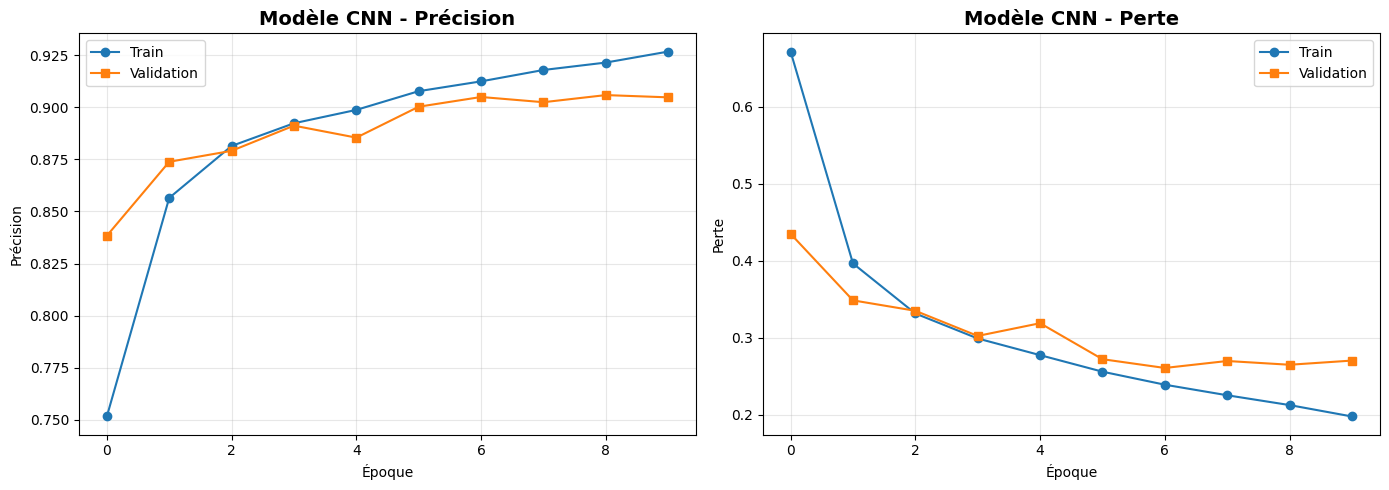


 Précision finale sur test: 90.11%
ANN - Précision test: 87.74%
CNN - Précision test: 90.11%
Amélioration: +2.37%

REPONSES AUX QUESTIONS:

Q1: Différence ANN vs CNN ?
- ANN: Traite l'image comme vecteur 1D (perd structure spatiale)
- CNN: Préserve la structure 2D, détecte patterns locaux
- CNN utilise des filtres convolutifs et pooling

Q2: Pourquoi CNN meilleur ?
- Détection de features locales (contours, textures)
- Invariance spatiale (détecte patterns où qu'ils soient)
- Moins de paramètres grâce au partage de poids
- Architecture adaptée à la nature des images

Q3: Rôle du Pooling ?
- Réduit la dimensionnalité (downsampling)
- Invariance aux petites translations
- Réduit le calcul et le surapprentissage
- MaxPooling garde la valeur maximale dans chaque région


In [76]:
# Reshape pour CNN (ajouter dimension "canal")
x_train_cnn = x_train_norm.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_norm.reshape(-1, 28, 28, 1)

model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
], name='CNN_Model')

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_cnn.summary()

# ENtrainement
history_cnn = model_cnn.fit(
    x_train_cnn, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# Visualisation
plot_training_history(history_cnn, 'Modèle CNN')

# Evaluation
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"\n Précision finale sur test: {test_acc_cnn*100:.2f}%")

# Comparaison ANN vs CNN
print(f"ANN - Précision test: {test_acc_ann*100:.2f}%")
print(f"CNN - Précision test: {test_acc_cnn*100:.2f}%")
print(f"Amélioration: +{(test_acc_cnn - test_acc_ann)*100:.2f}%")

print("\nREPONSES AUX QUESTIONS:")
print("\nQ1: Différence ANN vs CNN ?")
print("- ANN: Traite l'image comme vecteur 1D (perd structure spatiale)")
print("- CNN: Préserve la structure 2D, détecte patterns locaux")
print("- CNN utilise des filtres convolutifs et pooling")
print("\nQ2: Pourquoi CNN meilleur ?")
print("- Détection de features locales (contours, textures)")
print("- Invariance spatiale (détecte patterns où qu'ils soient)")
print("- Moins de paramètres grâce au partage de poids")
print("- Architecture adaptée à la nature des images")
print("\nQ3: Rôle du Pooling ?")
print("- Réduit la dimensionnalité (downsampling)")
print("- Invariance aux petites translations")
print("- Réduit le calcul et le surapprentissage")
print("- MaxPooling garde la valeur maximale dans chaque région")

***Étape 6 — Visualisation des performances***

**Questions :**
1. Quelles classes sont le plus souvent confondues ?
2. Comment peut-on réduire ces erreurs de classification ?

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


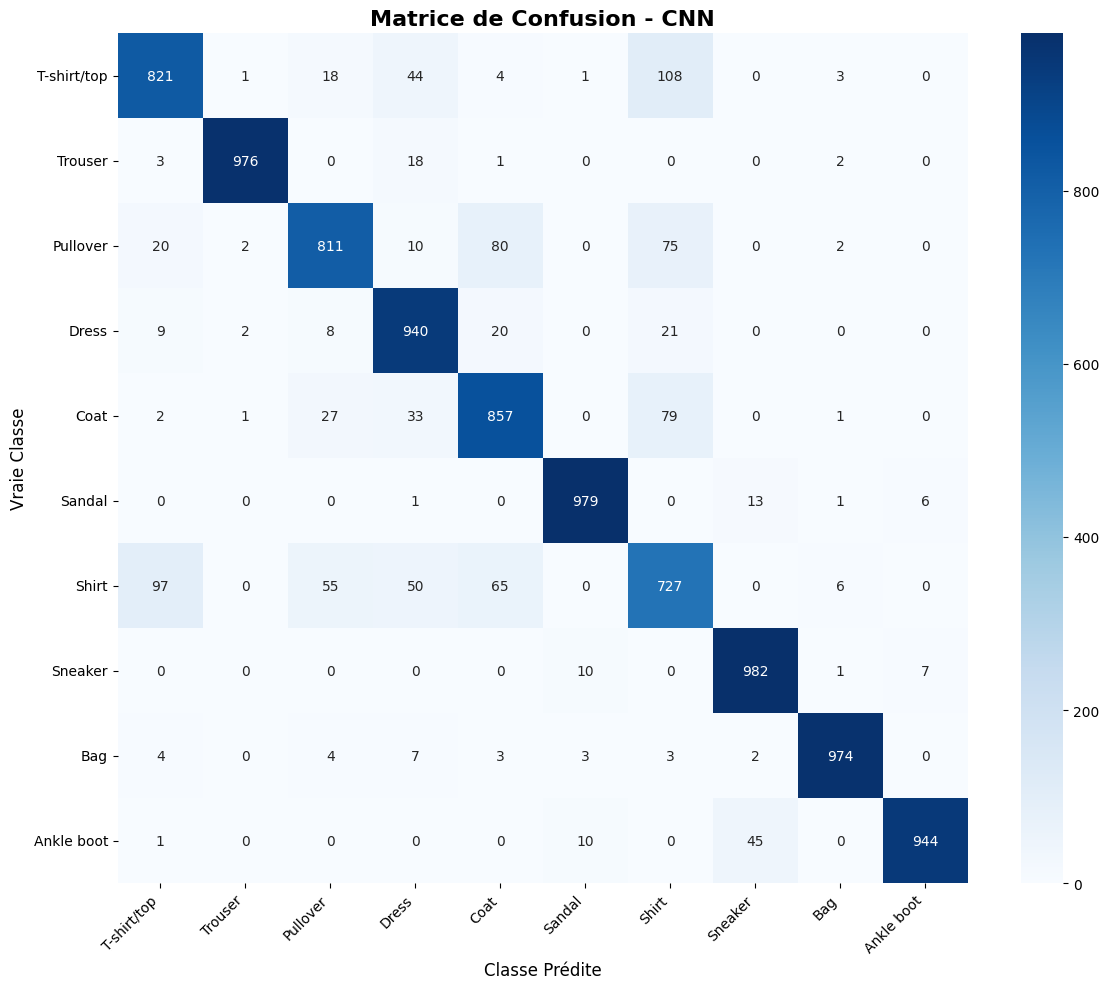


REPONSES AUX QUESTIONS:

Q1: Classes confondues ?
- Shirt/T-shirt/Pullover (vêtements hauts similaires)
- Sneaker/Ankle boot (chaussures similaires)
- Coat/Pullover (vêtements longs)

Q2: Réduire les erreurs ?
- Data augmentation (rotations, zooms)
- Modèle plus profond
- Dropout pour réduire overfitting
- Plus de données d'entrainement
- Techniques d'ensemble (plusieurs modèles)


In [77]:
y_pred = model_cnn.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - CNN', fontsize=16, fontweight='bold')
plt.ylabel('Vraie Classe', fontsize=12)
plt.xlabel('Classe Prédite', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nREPONSES AUX QUESTIONS:")
print("\nQ1: Classes confondues ?")
print("- Shirt/T-shirt/Pullover (vêtements hauts similaires)")
print("- Sneaker/Ankle boot (chaussures similaires)")
print("- Coat/Pullover (vêtements longs)")
print("\nQ2: Réduire les erreurs ?")
print("- Data augmentation (rotations, zooms)")
print("- Modèle plus profond")
print("- Dropout pour réduire overfitting")
print("- Plus de données d'entrainement")
print("- Techniques d'ensemble (plusieurs modèles)")

***Étape 7 : Data Augmentation***

**Questions :**
1. Quel est l’intérêt de la Data Augmentation ?
2. Quels types de transformations semblent les plus efficaces pour ce dataset ?

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration de l'augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)

model_cnn_aug = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cnn_aug.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Note: On utilise moins d'époques pour l'exemple
history_aug = model_cnn_aug.fit(
    datagen.flow(x_train_cnn, y_train_cat, batch_size=128),
    epochs=5,
    validation_data=(x_test_cnn, y_test_cat),
    steps_per_epoch=len(x_train_cnn) // 128,
    verbose=1
)

test_loss_aug, test_acc_aug = model_cnn_aug.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"\nPrécision avec augmentation: {test_acc_aug*100:.2f}%")

print("\nREPONSES AUX QUESTIONS:")
print("\nQ1: Intérêt de la Data Augmentation ?")
print("- Augmente artificiellement la taille du dataset")
print("- Réduit le surapprentissage")
print("- Rend le modèle plus robuste aux variations")
print("- Améliore la généralisation")
print("\nQ2: Transformations efficaces ?")
print("- Rotation légère (10°): vêtements parfois inclinés")
print("- Translation: position variable dans l'image")
print("- Zoom: différentes échelles")
print("- Pas de flip horizontal pour Fashion-MNIST (asymétrie)")

C:\Users\chakh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 56s 108ms/step - accuracy: 0.6628 - loss: 0.8872 - val_accuracy: 0.7792 - val_loss: 0.5756
Epoch 2/5
  1/468 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.7109 - loss: 0.7546

C:\Users\chakh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7109 - loss: 0.7546 - val_accuracy: 0.7801 - val_loss: 0.5762
Epoch 3/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - accuracy: 0.7599 - loss: 0.6316 - val_accuracy: 0.7905 - val_loss: 0.5268
Epoch 4/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7578 - loss: 0.6797 - val_accuracy: 0.7913 - val_loss: 0.5189
Epoch 5/5
468/468 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - accuracy: 0.7858 - loss: 0.5613 - val_accuracy: 0.8210 - val_loss: 0.4678

Précision avec augmentation: 82.10%

REPONSES AUX QUESTIONS:

Q1: Intérêt de la Data Augmentation ?
- Augmente artificiellement la taille du dataset
- Réduit le surapprentissage
- Rend le modèle plus robuste aux variations
- Améliore la généralisation

Q2: Transformations efficaces ?
- Rotation légère (10°): vêtements parfois inclinés
- Translation: position variable dans l'image
- Zoom: différentes échelles
- Pas de flip horizontal pour Fashion-MNIST (asymétrie)


In [79]:
print(f"\nPERFORMANCES:")
print(f"- ANN Dense: {test_acc_ann*100:.2f}%")
print(f"- CNN Standard: {test_acc_cnn*100:.2f}%")
print(f"- CNN + Augmentation: {test_acc_aug*100:.2f}%")
print(f"\nMEILLEUR MODELE: CNN")
print(f"- Exploite la structure spatiale des images")
print(f"- Détection automatique de features")
print(f"- Moins de paramètres, meilleure performance")
print("\nCONCEPTS CLES APPRIS:")
print("- Preprocessing et normalisation")
print("- Différence ANN vs CNN")
print("- Fonctions d'activation")
print("- Data augmentation")
print("- Analyse des erreurs avec matrice de confusion")


PERFORMANCES:
- ANN Dense: 87.74%
- CNN Standard: 90.11%
- CNN + Augmentation: 82.10%

MEILLEUR MODELE: CNN
- Exploite la structure spatiale des images
- Détection automatique de features
- Moins de paramètres, meilleure performance

CONCEPTS CLES APPRIS:
- Preprocessing et normalisation
- Différence ANN vs CNN
- Fonctions d'activation
- Data augmentation
- Analyse des erreurs avec matrice de confusion
